In [1]:
#Import Libraries
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2, RFE
from yellowbrick.model_selection import rfecv
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid',palette='viridis')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Load Data
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Pima.csv', index_col=0)
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
#Define x and y

In [4]:
x = df.iloc[:,:-1]
y = df['class']

In [5]:
x

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


# Univariate Selection

- We use Chi2 test to perform the feature selection.
- When two features are independent, the observed count is close to the expected count, thus we will have smaller Chi-Square value. So high Chi-Square value indicates that the hypothesis of independence is incorrect. 
- In simple words, higher the Chi-Square value the feature is more dependent on the response and it can be selected for model training.

In [4]:
#Chi square for feature selection

In [6]:
test = SelectKBest(score_func=chi2, k=5)

In [7]:
test.fit(x,y)

SelectKBest(k=5, score_func=<function chi2 at 0x0000024B8E9B7940>)

In [8]:
test.scores_

array([ 111.51969064, 1411.88704064,   17.60537322,   53.10803984,
       2175.56527292,  127.66934333,    5.39268155,  181.30368904])

In [11]:
chi_test = pd.DataFrame(test.scores_).T
chi_test.columns = x.columns

In [12]:
chi_test

,preg,plas,pres,skin,test,mass,pedi,age
0,111.519691,1411.887041,17.605373,53.10804,2175.565273,127.669343,5.392682,181.303689


# Recursive Feature Elimination

In [5]:
#RFE with logistic regression

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
rfe = RFE(LogisticRegression())

In [15]:
rfe.fit(x,y)

RFE(estimator=LogisticRegression())

In [17]:
rfe_df = pd.DataFrame(rfe.ranking_).T
rfe_df.columns = x.columns
rfe_df

,preg,plas,pres,skin,test,mass,pedi,age
0,1,1,3,4,5,1,1,2


In [6]:
#read the data

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/fetal_health.csv')
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [19]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [21]:
rfe = RFE(LogisticRegression())
rfe.fit(x,y)

RFE(estimator=LogisticRegression())

In [22]:
rfe.ranking_

array([ 1,  9,  7,  8, 10, 12, 11,  1,  1,  1,  1,  5,  6,  1,  1,  3,  1,
        1,  1,  2,  4])

In [25]:
rfe_df = pd.DataFrame({
    'Ranking' : rfe.ranking_,
    'Features' : x.columns
})
rfe_df

,Ranking,Features
0,1,baseline value
1,9,accelerations
2,7,fetal_movement
3,8,uterine_contractions
4,10,light_decelerations
5,12,severe_decelerations
6,11,prolongued_decelerations
7,1,abnormal_short_term_variability
8,1,mean_value_of_short_term_variability
9,1,percentage_of_time_with_abnormal_long_term_var...


In [26]:
rfe_df[rfe_df['Ranking']==1]

,Ranking,Features
0,1,baseline value
7,1,abnormal_short_term_variability
8,1,mean_value_of_short_term_variability
9,1,percentage_of_time_with_abnormal_long_term_var...
10,1,mean_value_of_long_term_variability
13,1,histogram_max
14,1,histogram_number_of_peaks
16,1,histogram_mode
17,1,histogram_mean
18,1,histogram_median


# RFE with Decision Tree 

In [27]:
from sklearn.tree import DecisionTreeClassifier

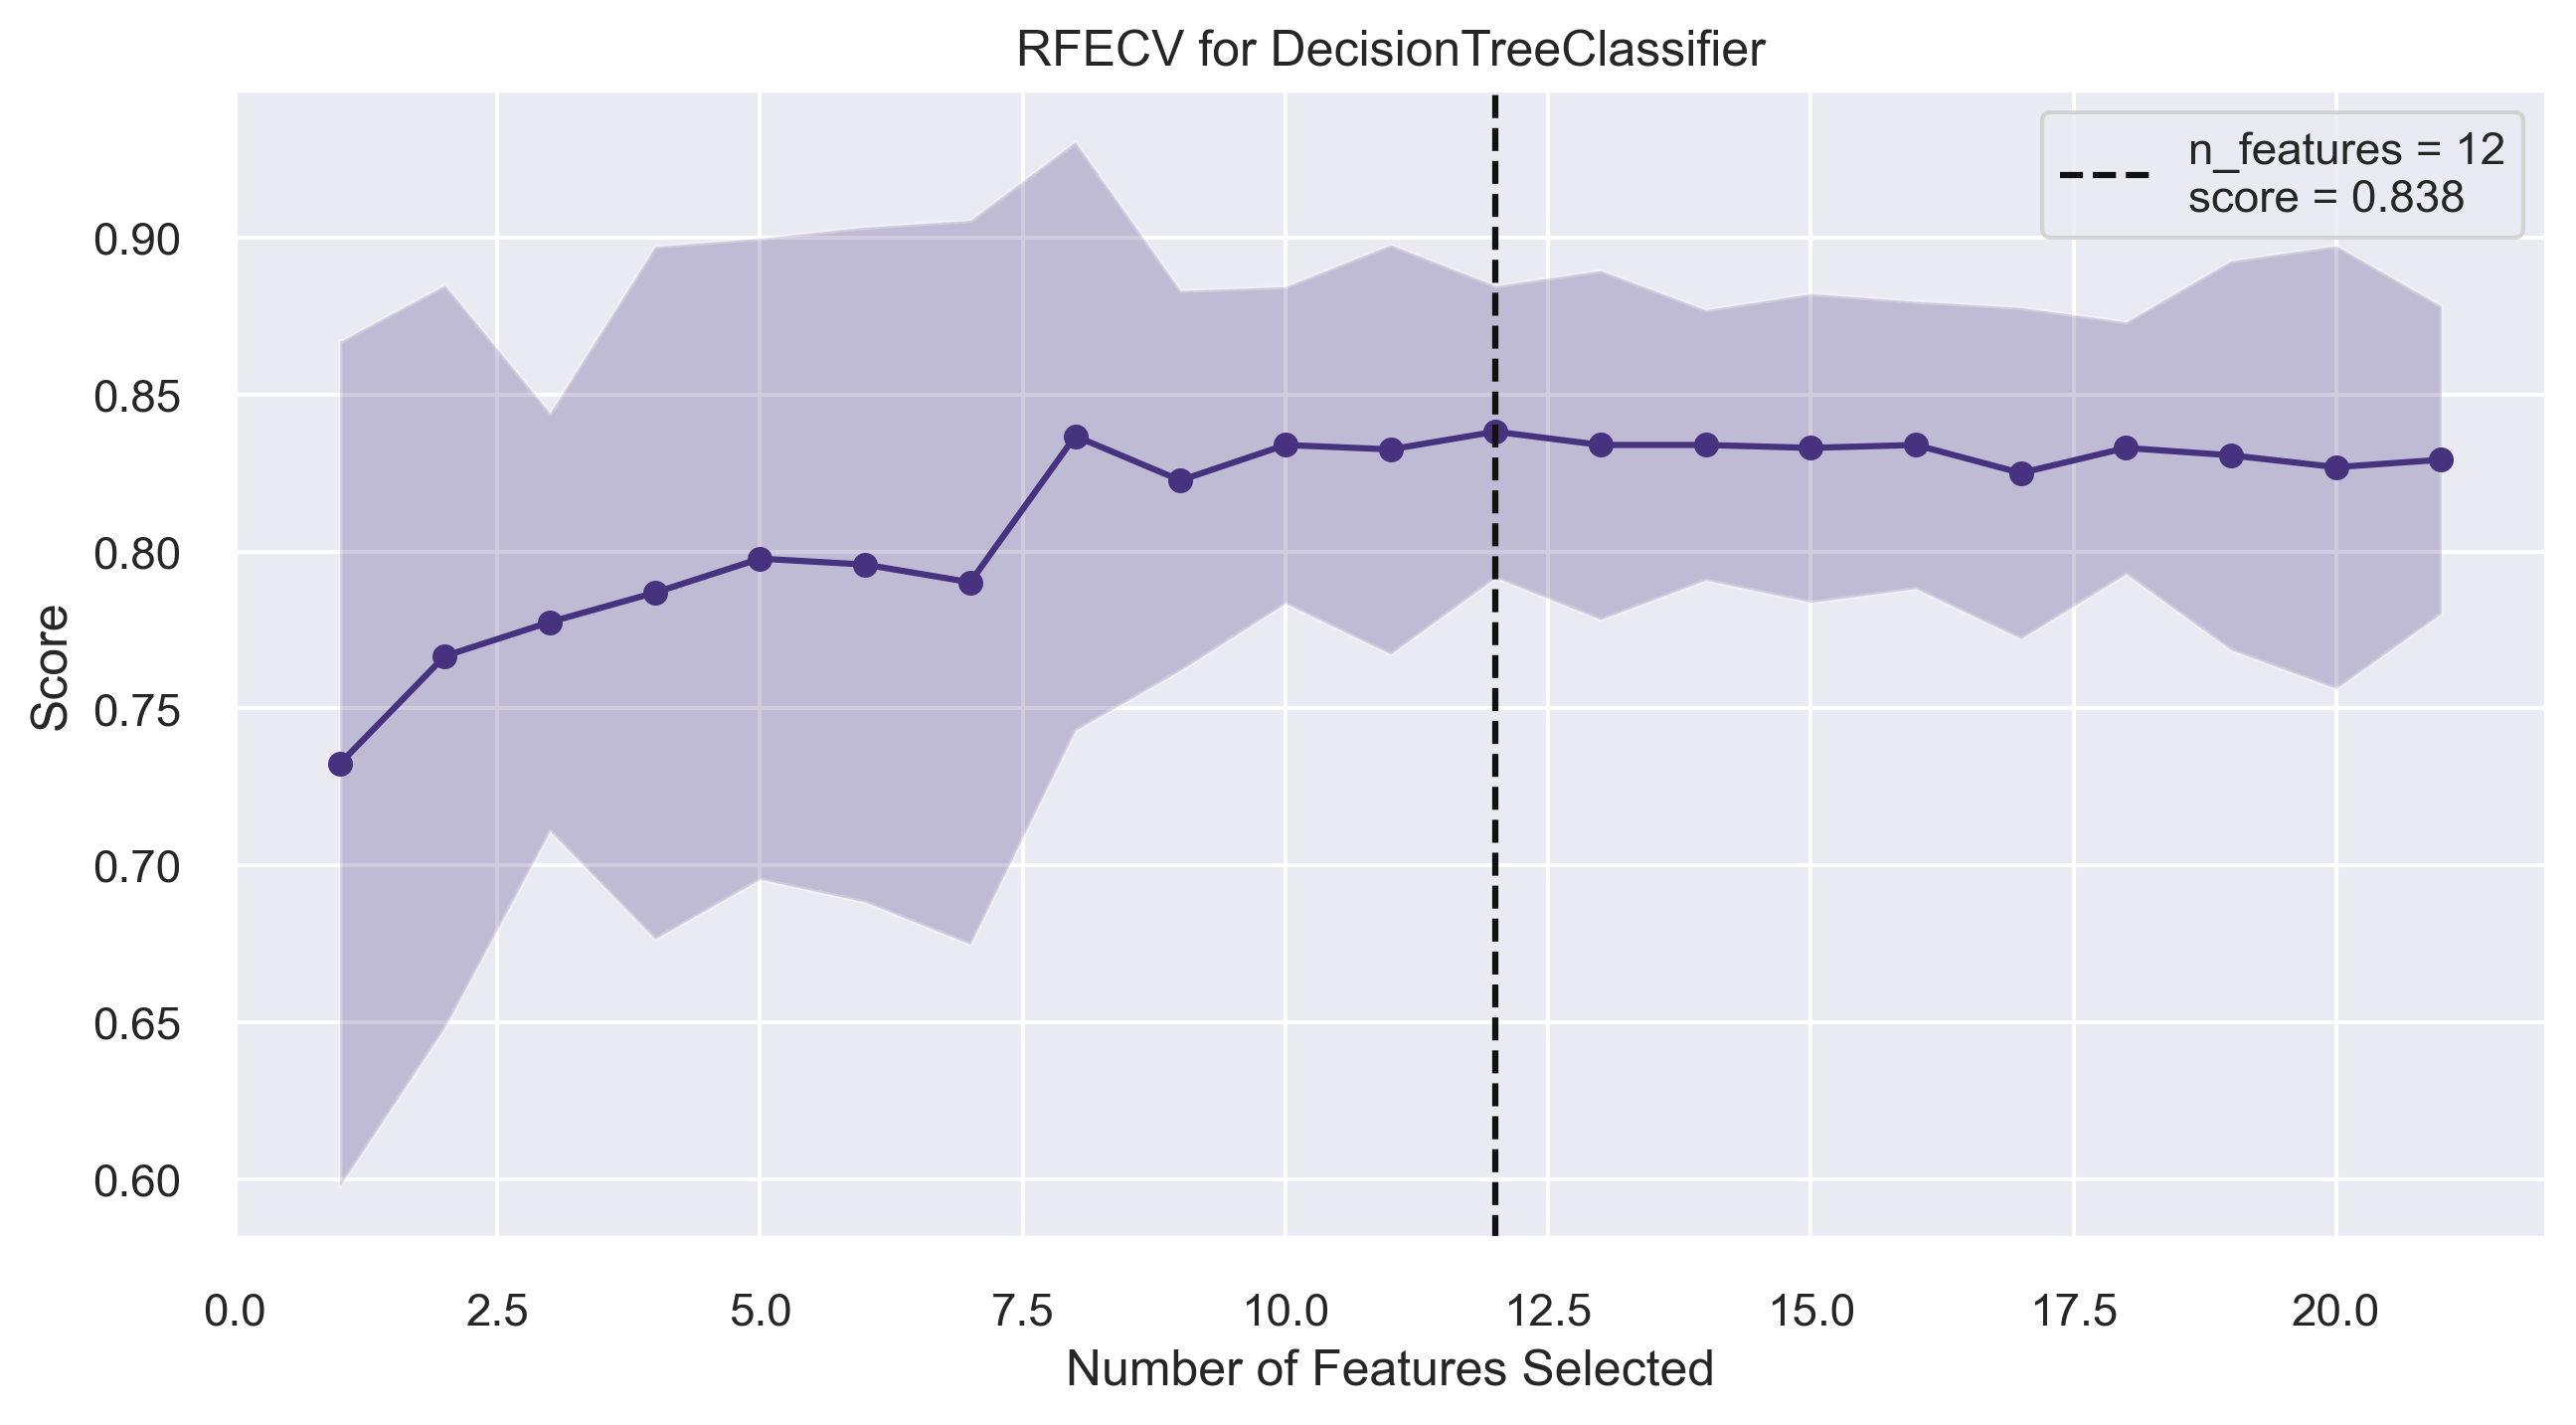

In [28]:
rfe_dt = rfecv(DecisionTreeClassifier(),x,y)

In [29]:
rfe_dt.ranking_

array([ 1,  1,  5,  1,  7,  9,  1,  1,  1,  1,  1,  1,  3,  1,  1,  8,  2,
        1, 10,  4,  6])

In [30]:
rfe_df = pd.DataFrame({
    'Ranking' : rfe_dt.ranking_,
    'Features' : x.columns
})
rfe_df

,Ranking,Features
0,1,baseline value
1,1,accelerations
2,5,fetal_movement
3,1,uterine_contractions
4,7,light_decelerations
5,9,severe_decelerations
6,1,prolongued_decelerations
7,1,abnormal_short_term_variability
8,1,mean_value_of_short_term_variability
9,1,percentage_of_time_with_abnormal_long_term_var...


In [31]:
rfe_df[rfe_df['Ranking']==1]

,Ranking,Features
0,1,baseline value
1,1,accelerations
3,1,uterine_contractions
6,1,prolongued_decelerations
7,1,abnormal_short_term_variability
8,1,mean_value_of_short_term_variability
9,1,percentage_of_time_with_abnormal_long_term_var...
10,1,mean_value_of_long_term_variability
11,1,histogram_width
13,1,histogram_max


# Tree Based method

In [7]:
#Tree Based method

In [32]:
dt = DecisionTreeClassifier()
dt.fit(x,y)

DecisionTreeClassifier()

In [33]:
dt.feature_importances_

array([0.02496763, 0.03527738, 0.00985239, 0.0272346 , 0.00307633,
       0.        , 0.0164112 , 0.11902082, 0.25241242, 0.13105635,
       0.0137506 , 0.01598456, 0.01863609, 0.05829334, 0.01636835,
       0.00500901, 0.01699898, 0.21558352, 0.00192271, 0.01511399,
       0.00302972])

In [34]:
imp_cols = pd.DataFrame({
    'Features' : x.columns,
    'IG' : dt.feature_importances_
})

In [35]:
imp_cols

,Features,IG
0,baseline value,0.024968
1,accelerations,0.035277
2,fetal_movement,0.009852
3,uterine_contractions,0.027235
4,light_decelerations,0.003076
5,severe_decelerations,0.000000
6,prolongued_decelerations,0.016411
7,abnormal_short_term_variability,0.119021
8,mean_value_of_short_term_variability,0.252412
9,percentage_of_time_with_abnormal_long_term_var...,0.131056


In [37]:
imp_cols.sort_values(by = 'IG', ascending=False)

,Features,IG
8,mean_value_of_short_term_variability,0.252412
17,histogram_mean,0.215584
9,percentage_of_time_with_abnormal_long_term_var...,0.131056
7,abnormal_short_term_variability,0.119021
13,histogram_max,0.058293
1,accelerations,0.035277
3,uterine_contractions,0.027235
0,baseline value,0.024968
12,histogram_min,0.018636
16,histogram_mode,0.016999


# In-Class Activity:

1. Perform Feature selection(Chi2, RFE, Tree Based) on Wine dataset.

In [38]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Wine.csv')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [39]:
x = df.iloc[:,:-1]
y = df['Customer_Segment']

In [40]:
test = SelectKBest(score_func=chi2, k= 10)

In [41]:
test.fit(x,y)

SelectKBest(score_func=<function chi2 at 0x0000024B8E9B7940>)

In [42]:
test.scores_

array([5.44549882e+00, 2.80686046e+01, 7.43380598e-01, 2.93836955e+01,
       4.50263809e+01, 1.56230759e+01, 6.33343081e+01, 1.81548480e+00,
       9.36828307e+00, 1.09016647e+02, 5.18253981e+00, 2.33898834e+01,
       1.65400671e+04])

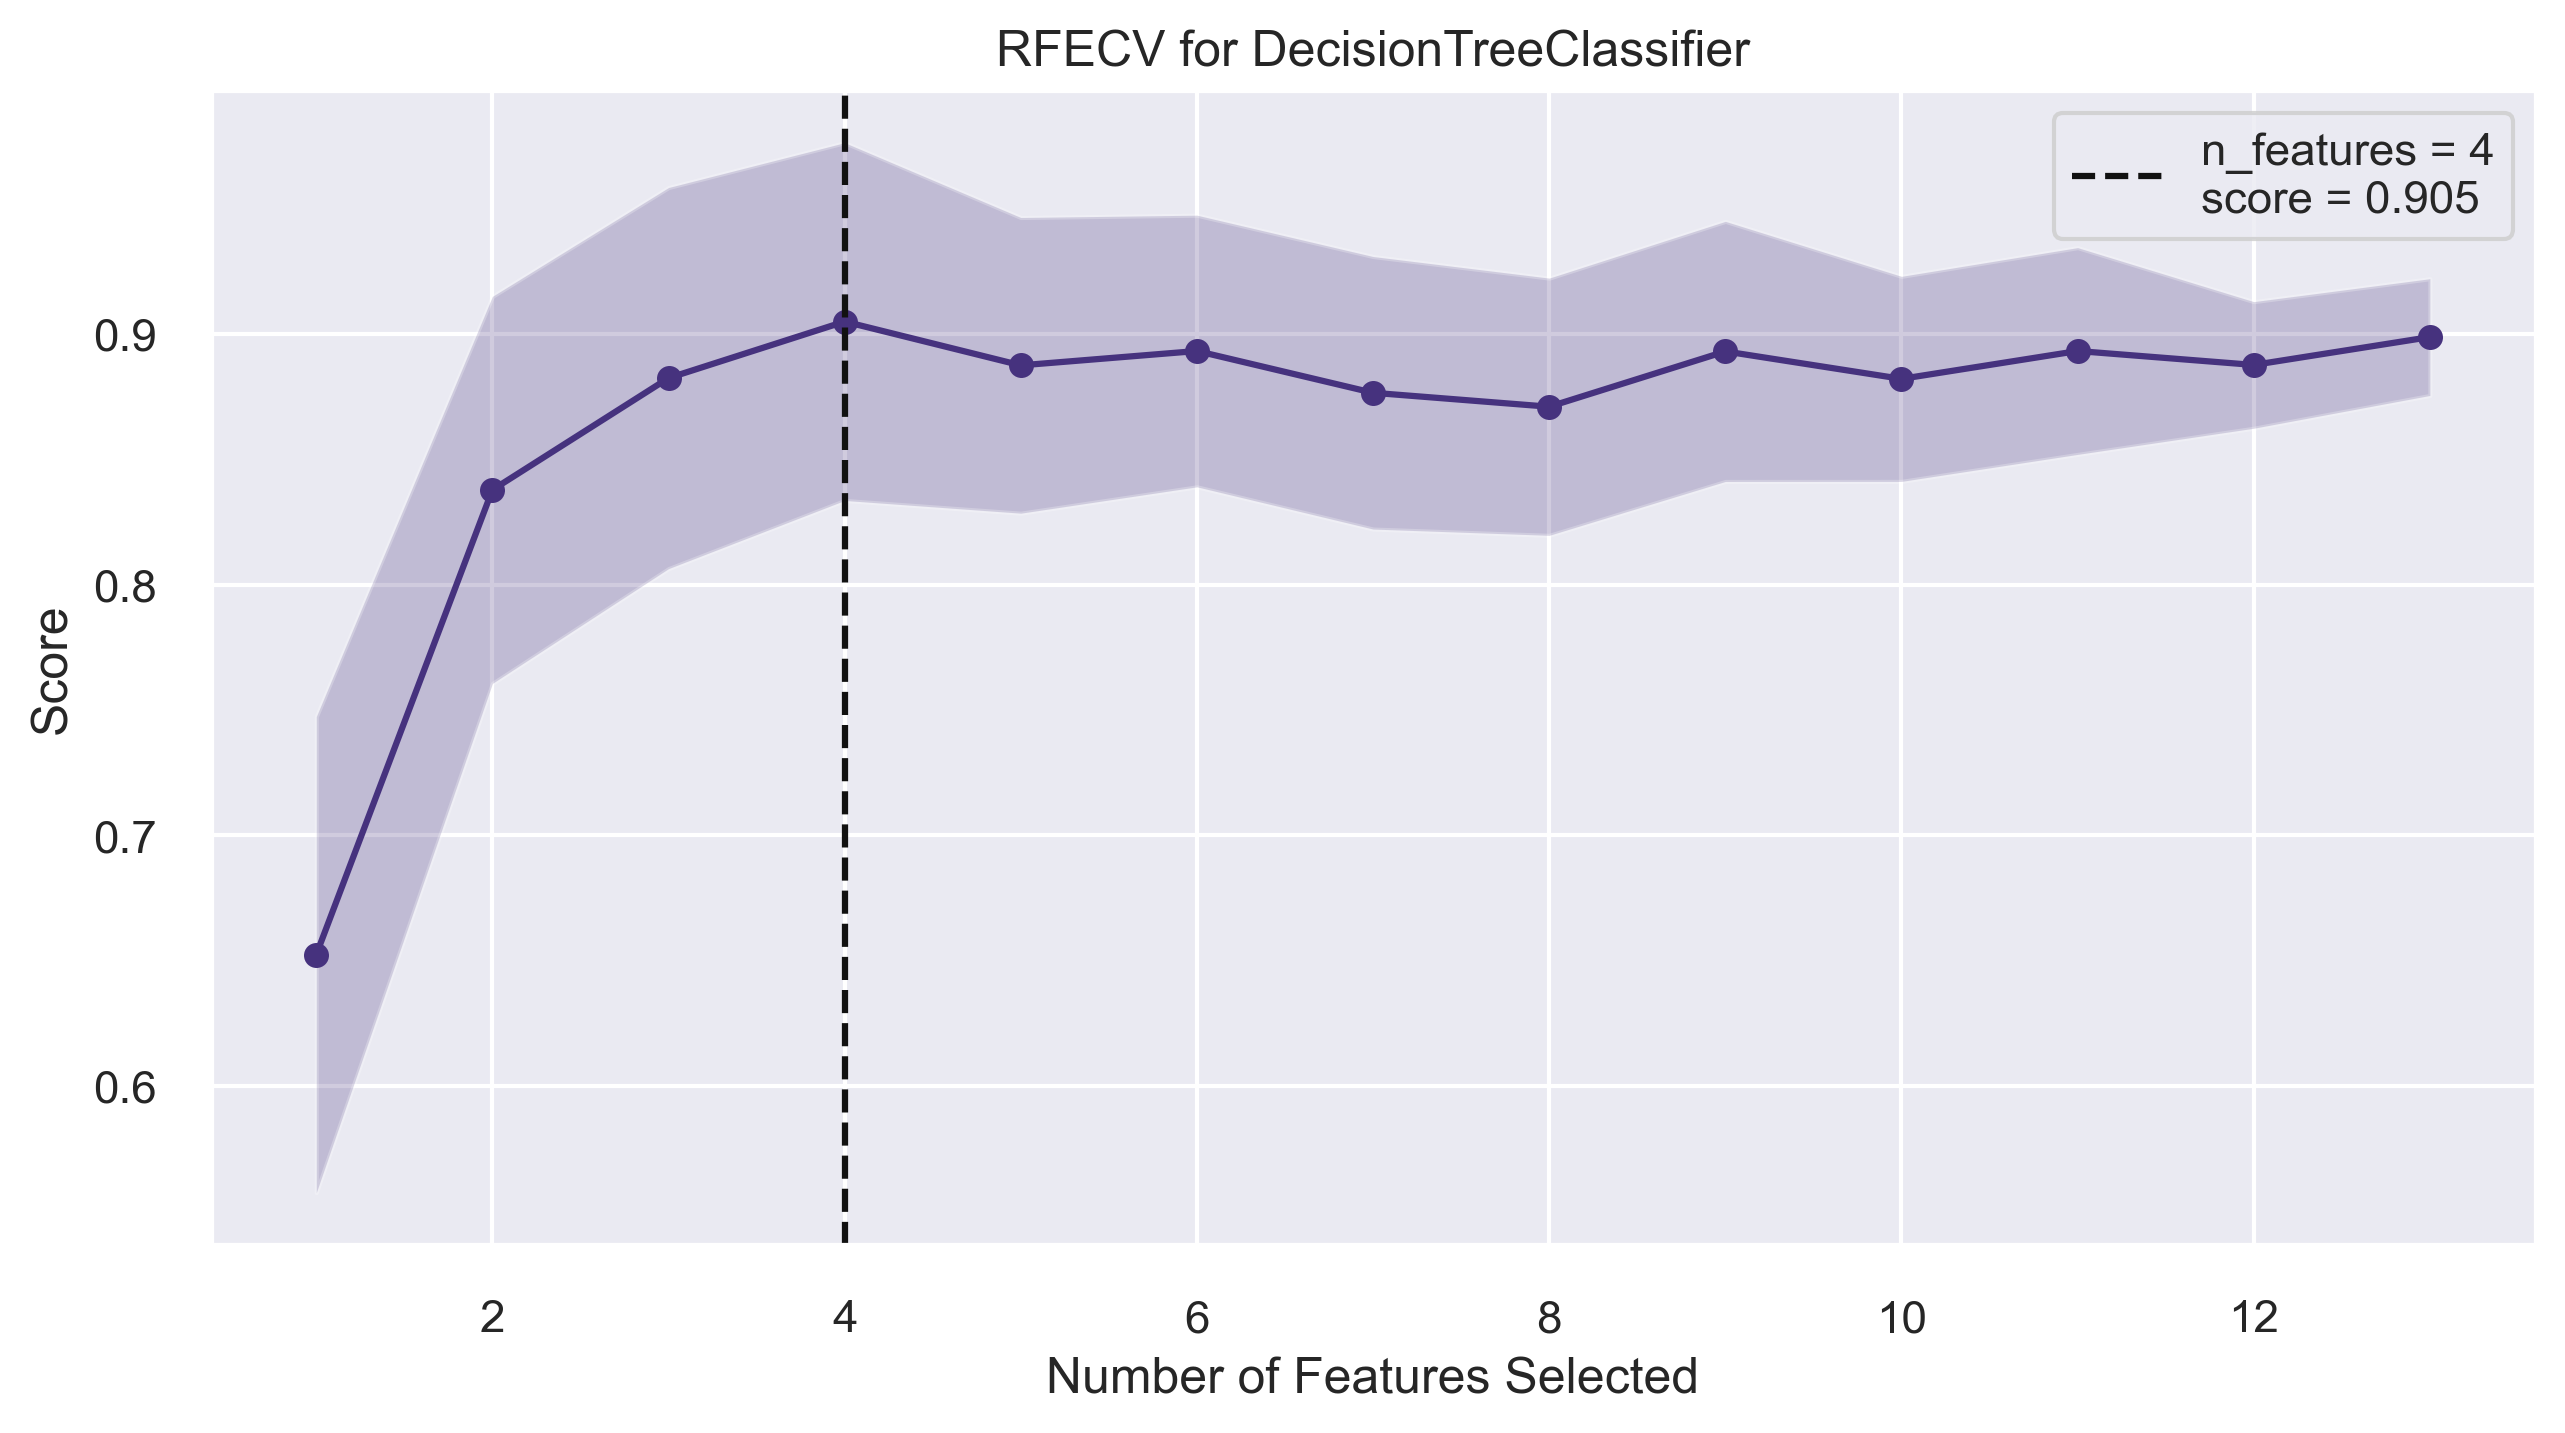

In [43]:
rfe = rfecv(DecisionTreeClassifier(),x,y)

In [44]:
rfe.ranking_

array([ 4,  8, 10,  9,  3,  7,  1,  6,  5,  1,  2,  1,  1])

In [45]:
x.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [46]:
dt = DecisionTreeClassifier()
dt.fit(x,y)

DecisionTreeClassifier()

In [47]:
dt.feature_importances_

array([0.01257056, 0.        , 0.01422316, 0.        , 0.03297845,
       0.        , 0.16704836, 0.        , 0.        , 0.02048135,
       0.05818509, 0.31204257, 0.38247045])